In [1]:
import pandas as pd
from collections import Counter

In [2]:
df = pd.read_csv('SVMHumanActivityRecognition.csv')

In [3]:
print(df.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [4]:
print(df.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   


In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
label = df.iloc[:,-1]

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=label)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

In [8]:
#Use of staircase

df_copy = df.copy()
df_copy['duration'] = ''

duration_df = (df_copy.groupby([label[label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])], 'subject'])['duration'].count() * 1.28)
duration_df = pd.DataFrame(duration_df)

In [9]:
duration_df

duration
Activity           subject          
WALKING_DOWNSTAIRS 1           62.72
                   2           60.16
                   3           62.72
                   4           57.60
                   5           60.16
                   6           61.44
                   7           60.16
                   8           48.64
                   9           53.76
                   10          48.64
                   11          58.88
                   12          58.88
                   13          60.16
                   14          57.60
                   15          53.76
                   16          60.16
                   17          58.88
                   18          70.40
                   19          49.92
                   20          57.60
                   21          57.60
                   22          46.08
                   23          69.12
                   24          70.40
                   25          74.24
                   26          64.00
                   27          56.32
                   28          58.88
                   29          61.44
                   30          79.36
WALKING_UPSTAIRS   1           67.84
                   2           61.44
                   3           75.52
                   4           66.56
                   5           60.16
                   6           65.28
                   7           65.28
                   8           52.48
                   9           62.72
                   10          60.16
                   11          69.12
                   12          66.56
                   13          70.40
                   14          69.12
                   15          61.44
                   16          65.28
                   17          61.44
                   18          74.24
                   19          51.20
                   20          65.28
                   21          60.16
                   22          53.76
                   23          65.28
                   24          75.52
                   25          83.20
                   26          70.40
                   27          65.28
                   28          65.28
                   29          62.72
                   30          83.20

In [10]:
plot_data = duration_df.reset_index().sort_values('duration', ascending=False)

In [11]:
plot_data

,Activity,subject,duration
59,WALKING_UPSTAIRS,30,83.20
54,WALKING_UPSTAIRS,25,83.20
29,WALKING_DOWNSTAIRS,30,79.36
53,WALKING_UPSTAIRS,24,75.52
32,WALKING_UPSTAIRS,3,75.52
47,WALKING_UPSTAIRS,18,74.24
24,WALKING_DOWNSTAIRS,25,74.24
17,WALKING_DOWNSTAIRS,18,70.40
55,WALKING_UPSTAIRS,26,70.40
42,WALKING_UPSTAIRS,13,70.40


In [12]:
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs','WALKING_DOWNSTAIRS':'Downstairs'})

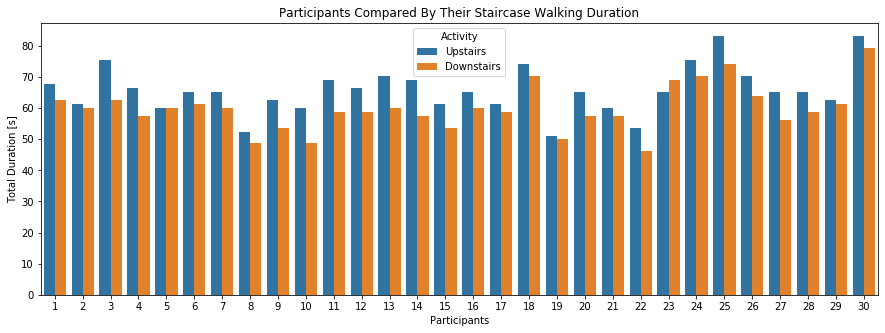

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='duration', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

In [14]:
#Finding correlation

feature_cols = df.columns[:-2]

correlated_values = df[feature_cols].corr()

correlated_values = correlated_values.stack().to_frame().reset_index().rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlation_score'})

In [15]:
correlated_values['abs_correlation'] = correlated_values.Correlation_score.abs()

In [16]:
correlated_values

,Feature_1,Feature_2,Correlation_score,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000,1.000000
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
2,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
3,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
4,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
...,...,...,...,...
314716,"angle(Z,gravityMean)","angle(tBodyGyroMean,gravityMean)",-0.015380,0.015380
314717,"angle(Z,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",-0.012549,0.012549
314718,"angle(Z,gravityMean)","angle(X,gravityMean)",-0.635231,0.635231
314719,"angle(Z,gravityMean)","angle(Y,gravityMean)",0.545614,0.545614


In [17]:
top_corr_fields = correlated_values.sort_values('Correlation_score', ascending = False).query('abs_correlation>0.8 ')
top_corr_fields = top_corr_fields[top_corr_fields['Feature_1'] != top_corr_fields['Feature_2']].reset_index(drop=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score

le = LabelEncoder()
df['Activity'] = le.fit_transform(df.Activity)
X = df.iloc[:,:-1]    
y = df.iloc[:,-1]

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Baseline model 

classifier = SVC()
clf = classifier.fit(X_train,y_train)
y_pred = clf.predict(X_test)

precision, recall, f_score, _ = error_metric(y_test, y_pred, average = 'weighted')
model1_score = accuracy_score(y_test, y_pred)
print(model1_score)
print(precision, recall, f_score)

0.9540453074433657
0.9539330598676863 0.9540453074433657 0.9539717683576193


In [19]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Feature selection using Linear SVC
lsvc = LinearSVC(C = 0.01, penalty="l1", dual=False, random_state=42).fit(X_train, y_train)

C:\Users\Mrunal\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
# Feature selection using Linear SVC
model_2 = SelectFromModel(lsvc, prefit=True)

new_train_features = model_2.transform(X_train)
new_test_features = model_2.transform(X_test)

print(new_train_features.shape,new_test_features.shape)

(7209, 110) (3090, 110)


In [21]:
# model building on reduced set of features

classifier_2 = SVC()
clf_2 = classifier_2.fit(new_train_features, y_train)
y_pred_new = clf_2.predict(new_test_features)


model2_score =accuracy_score(y_test, y_pred_new)
precision, recall, f_score, _ = error_metric(y_test, y_pred_new, average='weighted')
print(model2_score)
print(precision, recall, f_score)

0.9459546925566343
0.9458126691707023 0.9459546925566343 0.9458659879051475


In [22]:
#Hyperparameter tuning for SVC and final model building

from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'],'C': [100, 20, 1, 0.1]}

selector = GridSearchCV(SVC(), parameters, scoring = 'accuracy')
selector.fit(new_train_features, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 20, 1, 0.1], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.980 (+/-0.005) for {'C': 100, 'kernel': 'linear'}

0.986 (+/-0.006) for {'C': 100, 'kernel': 'rbf'}

0.982 (+/-0.006) for {'C': 20, 'kernel': 'linear'}

0.982 (+/-0.006) for {'C': 20, 'kernel': 'rbf'}

0.984 (+/-0.007) for {'C': 1, 'kernel': 'linear'}

0.936 (+/-0.012) for {'C': 1, 'kernel': 'rbf'}

0.978 (+/-0.008) for {'C': 0.1, 'kernel': 'linear'}

0.781 (+/-0.019) for {'C': 0.1, 'kernel': 'rbf'}



In [24]:
classifier_3 = SVC(kernel='rbf', C=100)
clf_3 = classifier_3.fit(new_train_features, y_train)
y_pred_final = clf_3.predict(new_test_features)
model3_score = accuracy_score(y_test, y_pred_final)

print('Accuracy score:', model3_score)

Accuracy score: 0.9838187702265372
